In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from matplotlib.markers import MarkerStyle
import pyiast

# define a function for getting optimized results

In [4]:
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    p_front = [myList[0]]
    for pair in myList[1:]:
        if maxY:
            if pair[1] >= p_front[-1][1]:
                p_front.append(pair)
        else:
            if pair[1] <= p_front[-1][1]:
                p_front.append(pair)
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

In [5]:
names = pd.read_excel("HVSA.xlsx")["Filename"]

# plot

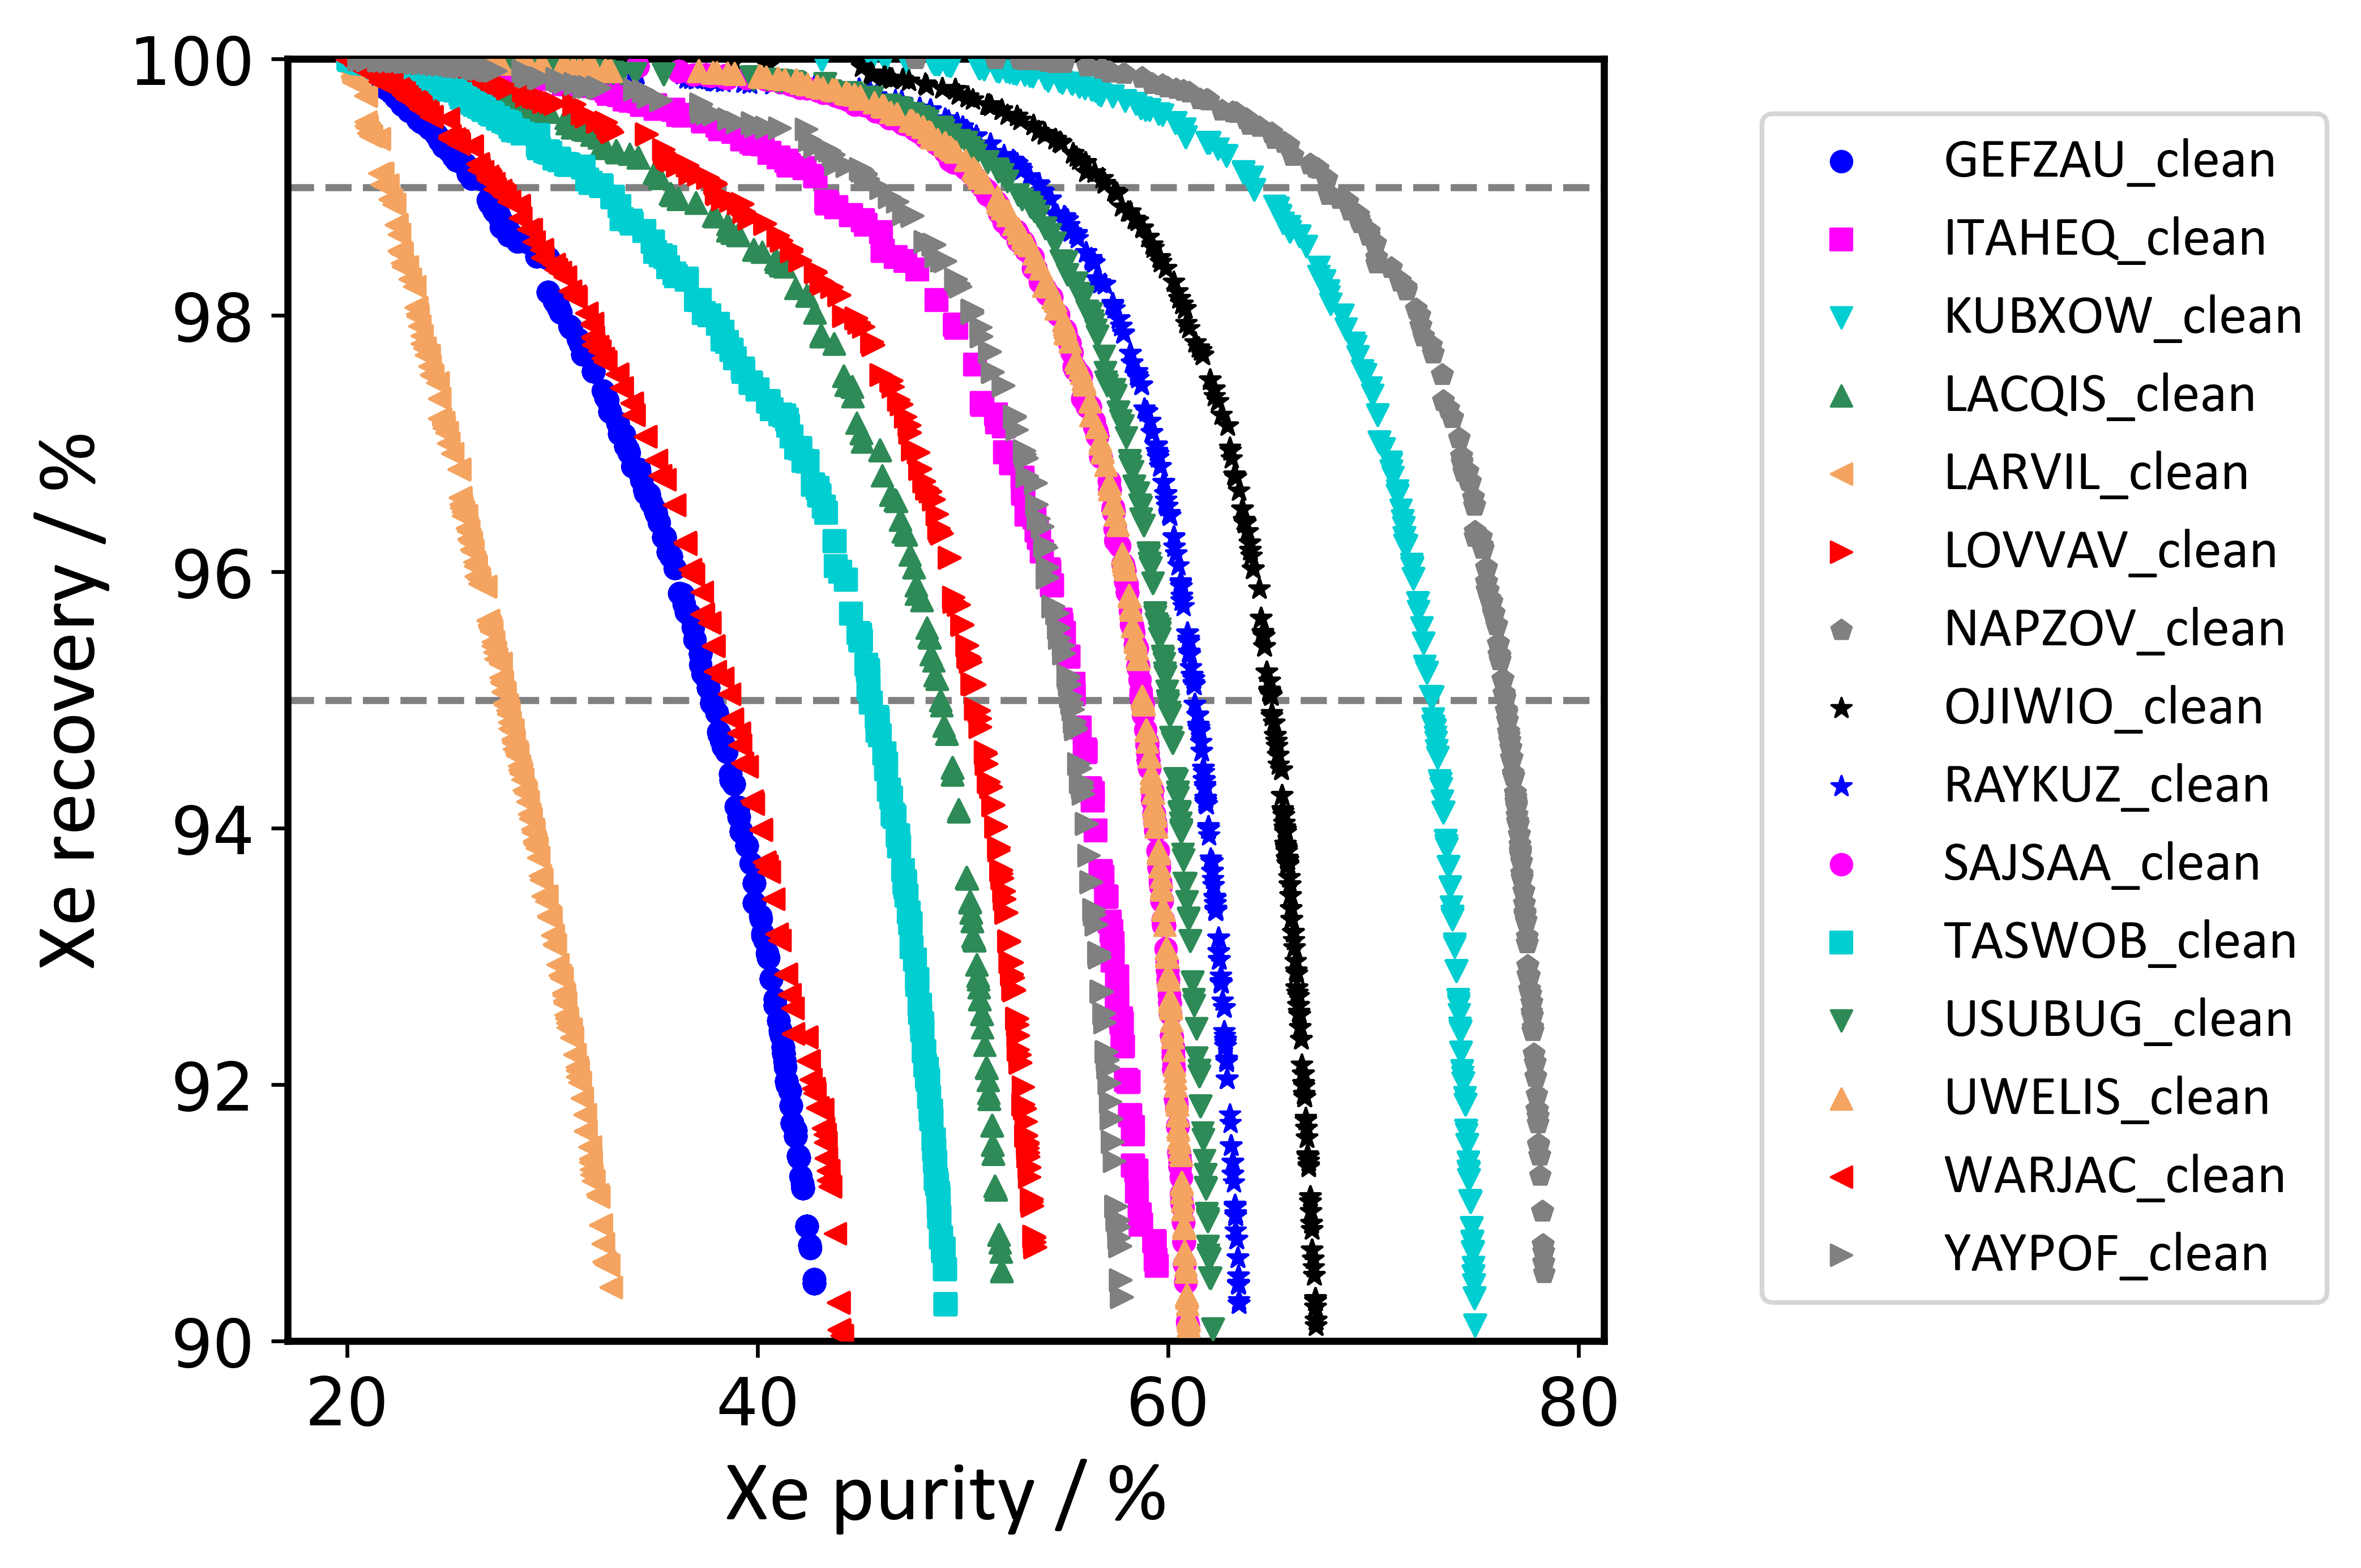

In [8]:
fig, ax = plt.subplots(figsize=(5,5),dpi=600)

colors = ["grey","red","sandybrown","seagreen","darkturquoise","magenta","blue","k","grey","red","sandybrown","seagreen","darkturquoise","magenta","blue"]
markers = ["o","s","v","^","<",">",'p', '*', '*',"o","s","v","^","<",">"]

ax.set_ylim(90,100)
# ax.set_xlim(45,58)

j=0
for name in names:
    data = pd.read_excel("HFVSAresults.xlsx",sheet_name=name)    
    p_front_Xe = pareto_frontier(data["Purity"]*100,data["Recovery"]*100, maxX = True, maxY = True)
#     p_front_Xe = pareto_frontier(data["Purity"],data["Recovery"], maxX = True, maxY = True)
    ax.scatter(p_front_Xe[0], p_front_Xe[1],c=colors[-j-1],s=20,marker=markers[j],linewidths=0.5,zorder=5,label=name)
    j=j+1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# ax.set_xscale('log')
# ax.set_yscale('log')

ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

plt.tick_params(axis='both', which='both', direction='out', labelsize=14)

plt.axhline(y=95,color="grey",linestyle="--")
plt.axhline(y=99,color="grey",linestyle="--")

ax.set_xlabel(r'Xe purity / %',fontdict={'family':'Calibri','size':18})
ax.set_ylabel(r"Xe recovery / %",fontdict={'family':'Calibri','size':18})

plt.legend(prop={'family':'Calibri','size':12},loc=(1.12,0.03), ncol=1)

plt.show()

In [2]:
def langmuir(p,M,K):
    return M*K*p/(1+M*p*K)

p = np.linspace(0,1,100)

In [4]:
data = pd.read_excel("./HVSA_iso.xlsx",sheet_name="features")

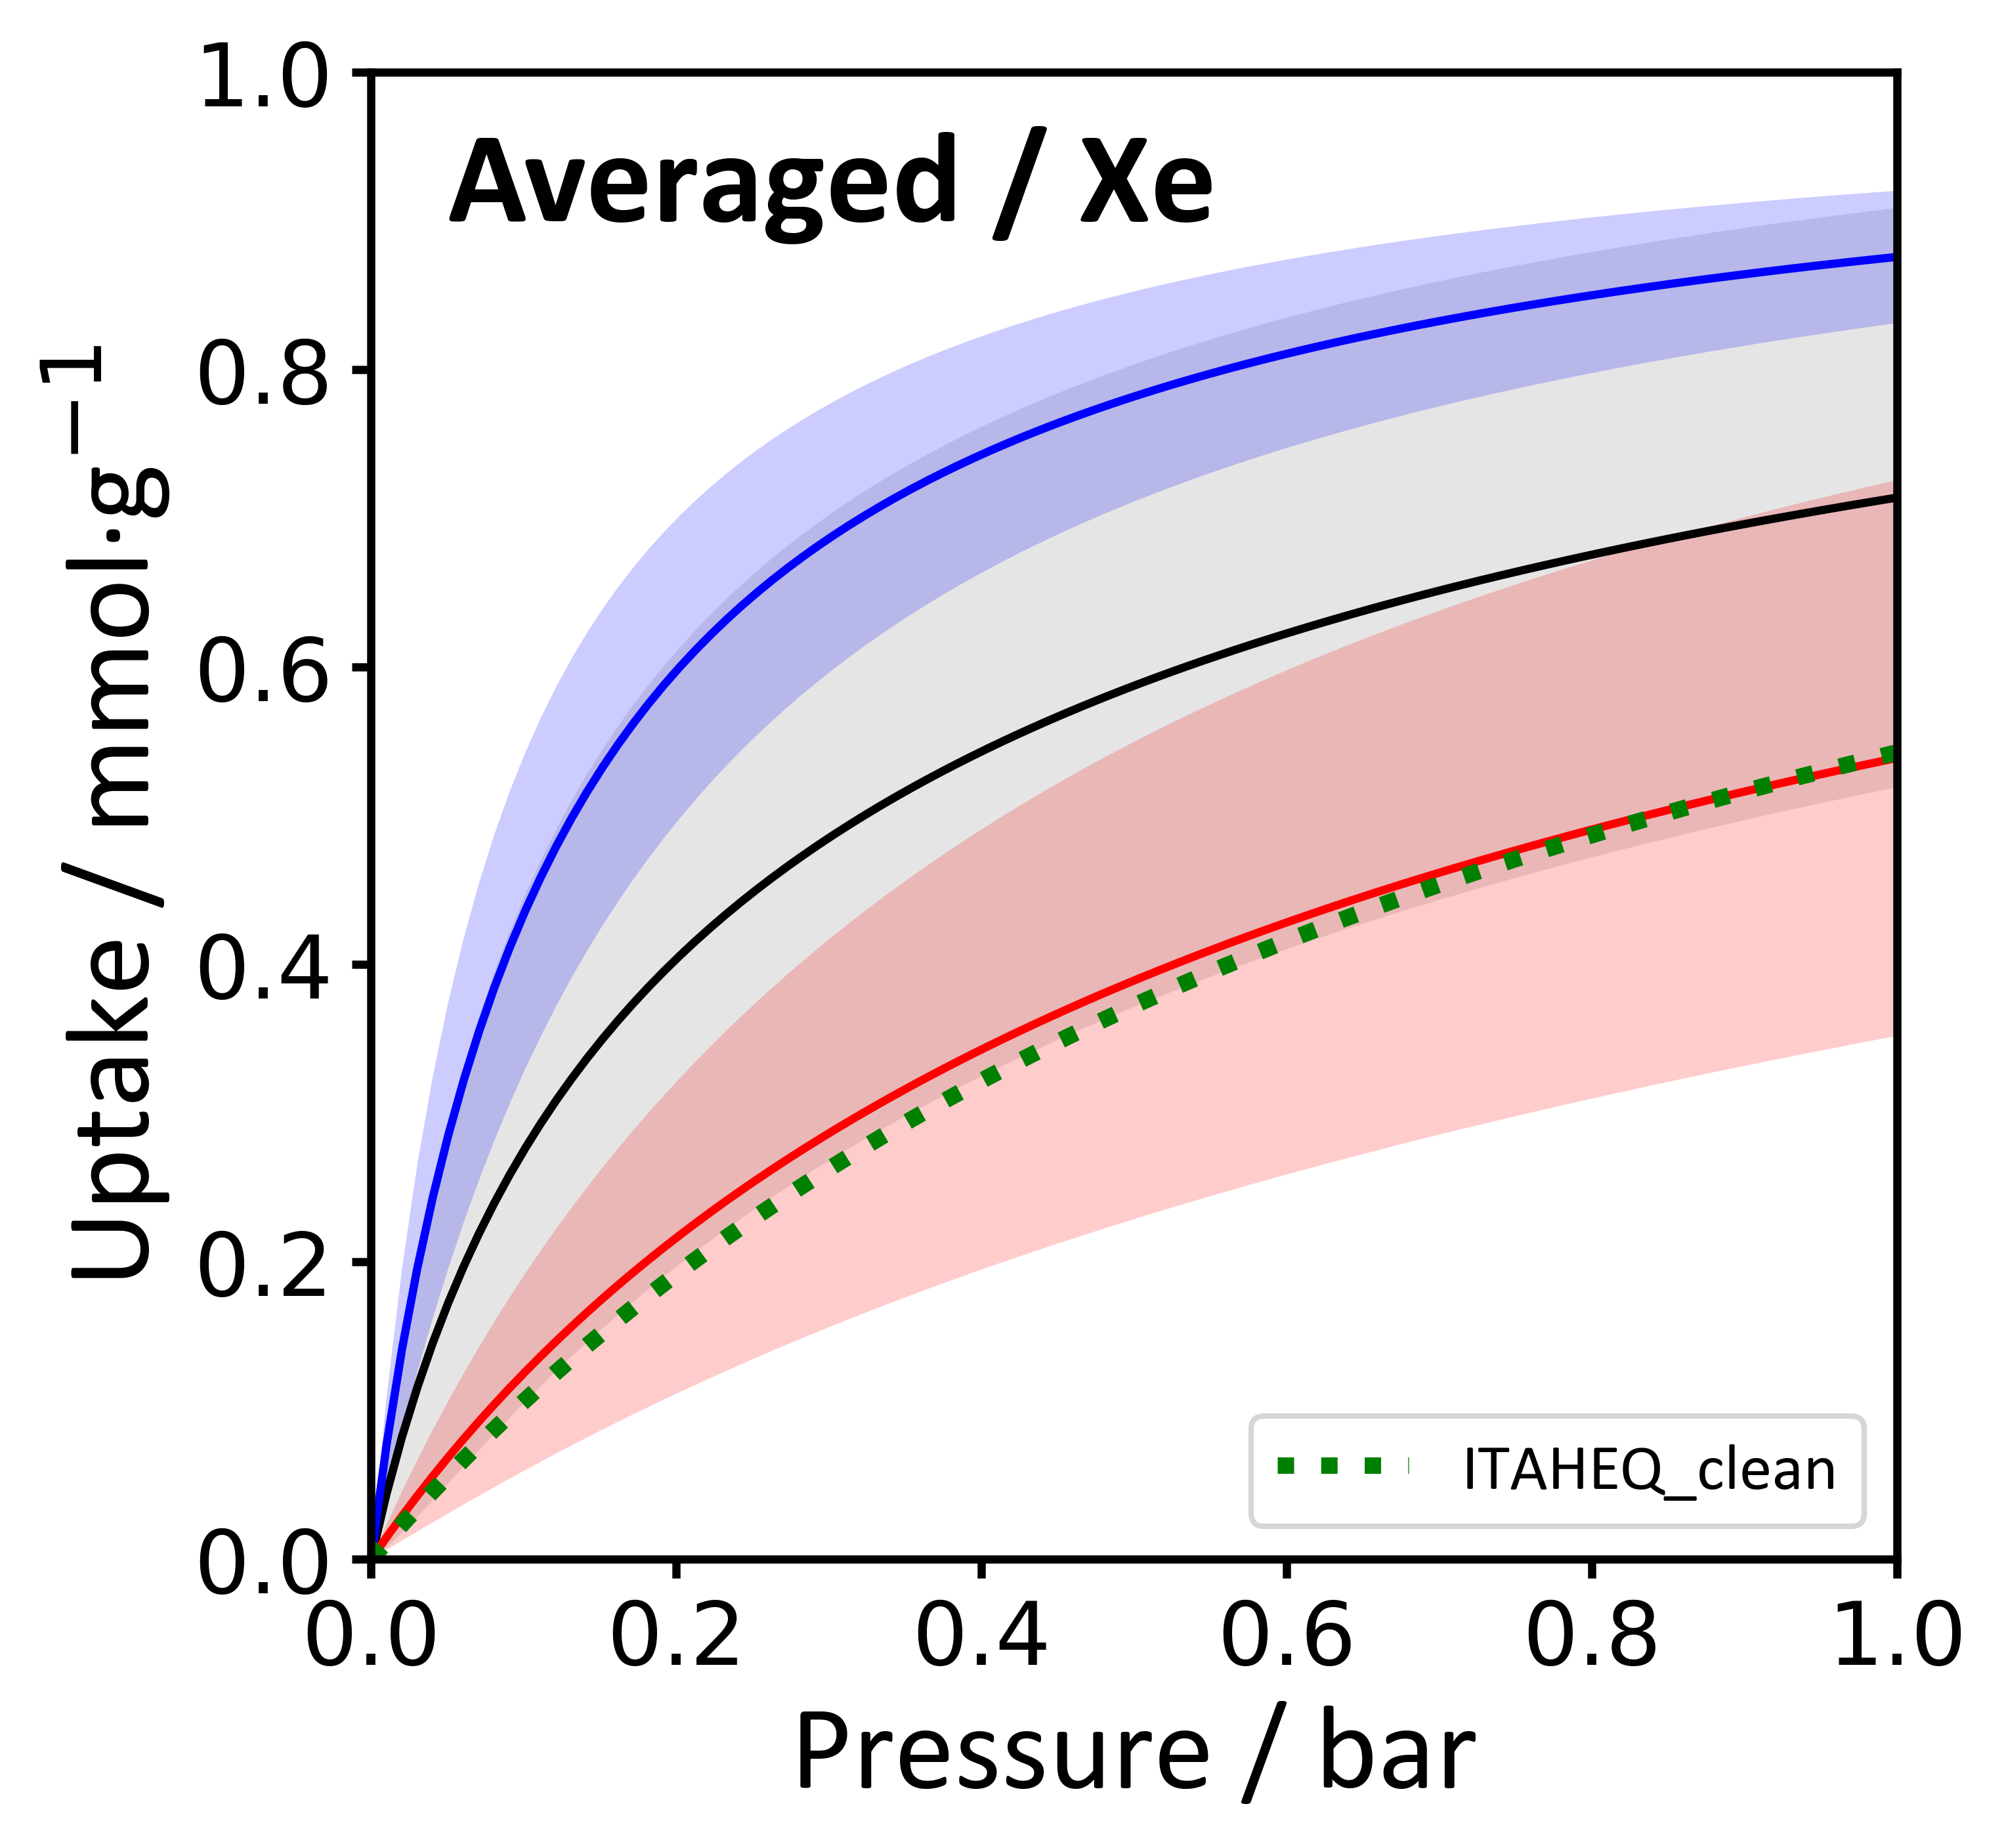

In [15]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]

fig, ax = plt.subplots(figsize=(5,5),dpi=600)

qe = []

std = []
for pe in p:   
    qall=[]
    for i in range(15):
        qpe=langmuir(pe,data["Xe_M"][i],data["Xe_K"][i])
        qall.append(qpe)
    std.append(np.std(qall))
    qe.append(np.mean(qall))

plt.plot(p,qe,linestyle="-",
                 color = 'black',linewidth = 1.5,alpha=1)

ax.fill_between(p, np.array(qe)+np.array(std), np.array(qe)-np.array(std), facecolor='grey', alpha=0.2)


qe = []
# qe=np.array([lambda x: langmuir(pe,data["Xe_M_pre"][x],data["Xe_K_cal"][x] for x in range(6367))])
std = []
for pe in p:   
    qall=[]
    for i in range(5):
        qpe=langmuir(pe,data["Xe_M"][i],data["Xe_K"][i])
        qall.append(qpe)
    std.append(np.std(qall))
    qe.append(np.mean(qall))

plt.plot(p,qe,linestyle="-",
                 color = 'b',linewidth = 1.5,alpha=1)

ax.fill_between(p, np.array(qe)+np.array(std), np.array(qe)-np.array(std), facecolor='b', alpha=0.2)

qe = []
# qe=np.array([lambda x: langmuir(pe,data["Xe_M_pre"][x],data["Xe_K_cal"][x] for x in range(6367))])
std = []
for pe in p:   
    qall=[]
    for i in range(10,15):
        qpe=langmuir(pe,data["Xe_M"][i],data["Xe_K"][i])
        qall.append(qpe)
    std.append(np.std(qall))
    qe.append(np.mean(qall))

plt.plot(p,qe,linestyle="-",
                 color = 'r',linewidth = 1.5,alpha=1)

ax.fill_between(p, np.array(qe)+np.array(std), np.array(qe)-np.array(std), facecolor='r', alpha=0.2)

q9 = langmuir(p,data["Xe_M"][7],data["Xe_K"][7])
plt.plot(p,q9,linestyle=":",
                 color = 'green',linewidth = 3,alpha=1,label = "ITAHEQ_clean")

plt.xlabel('Pressure / bar', fontdict={'family':'Calibri','size':22})
plt.ylabel('Uptake / mmol·g$^{-1}$', fontdict={'family':'Calibri','size':22})
plt.xlim([0, 1])
plt.ylim(0, 1)

ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

plt.tick_params(axis='both', which='both', direction='out', width=1.5,labelsize=16)

plt.minorticks_off()

plt.text(0.05,0.9,"Averaged / Xe", fontweight='bold',fontdict={'family':'Calibri','size':24})
plt.legend(prop={'family':'Calibri','size':12},loc="lower right", ncol=1)
# plt.xscale('log')
# plt.yscale('log')

plt.show()

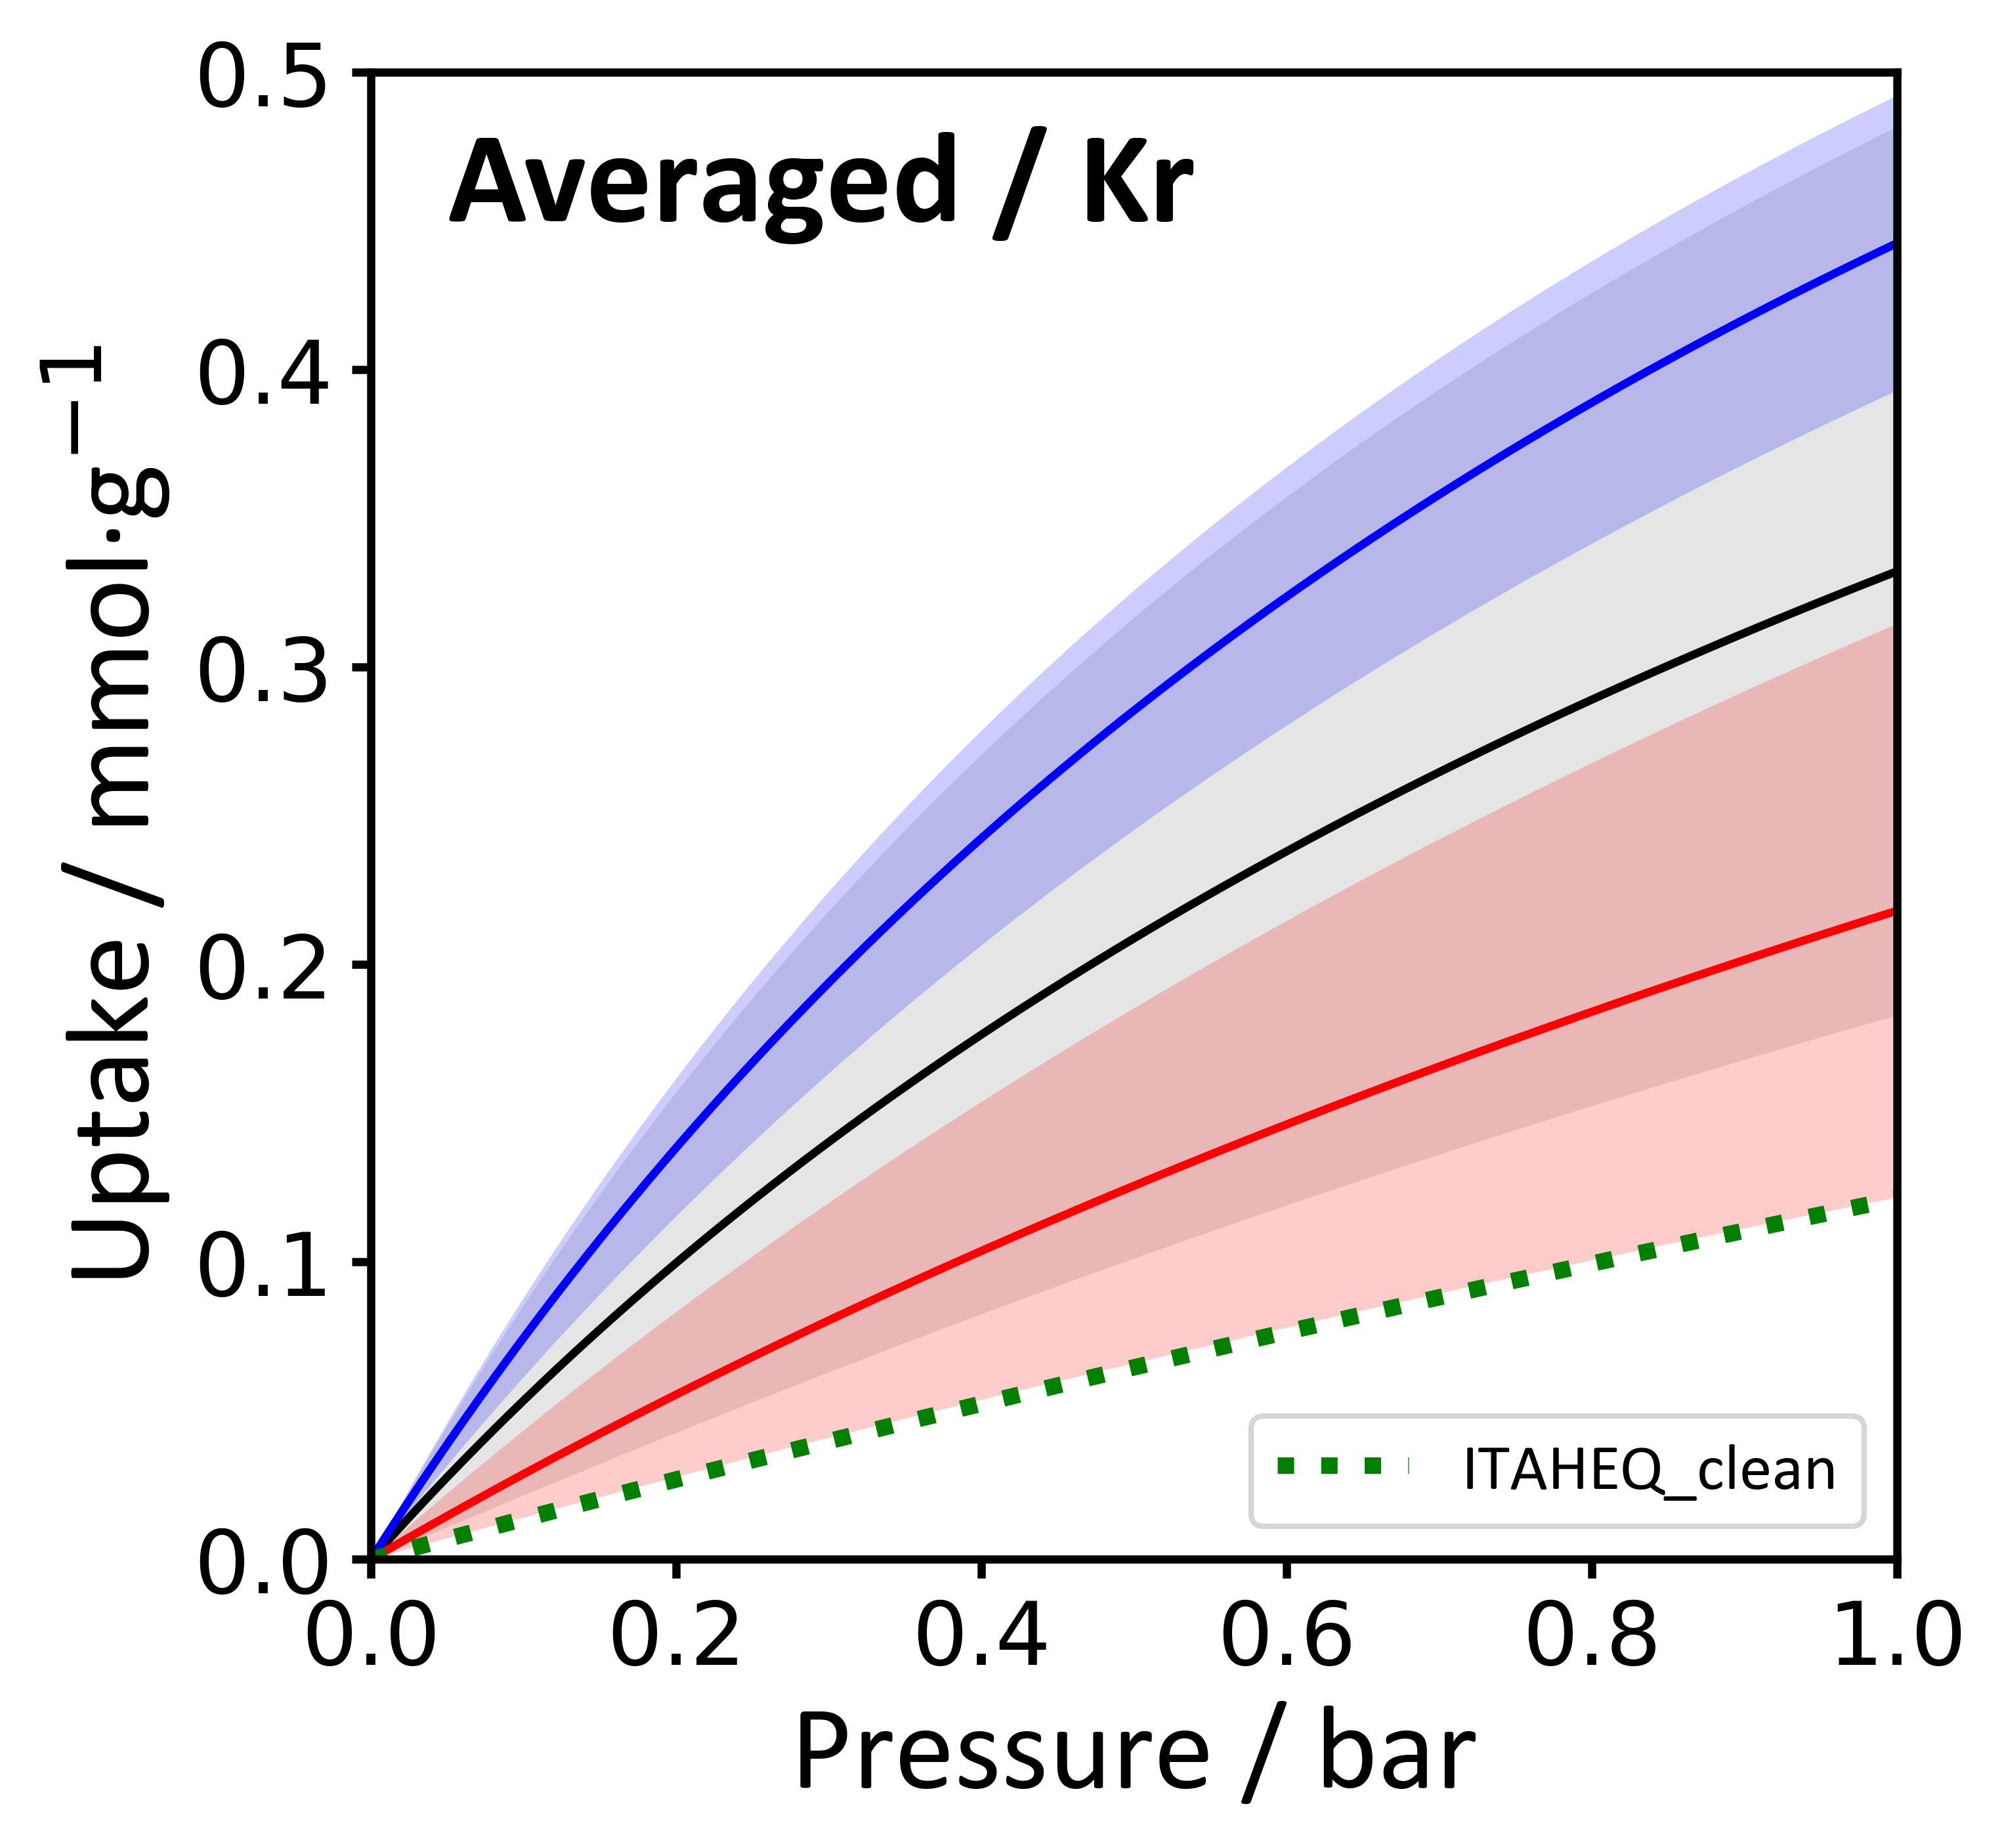

In [16]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]

fig, ax = plt.subplots(figsize=(5,5),dpi=600)

qe = []

std = []
for pe in p:   
    qall=[]
    for i in range(15):
        qpe=langmuir(pe,data["Kr_M"][i],data["Kr_K"][i])
        qall.append(qpe)
    std.append(np.std(qall))
    qe.append(np.mean(qall))

plt.plot(p,qe,linestyle="-",
                 color = 'black',linewidth = 1.5,alpha=1)

ax.fill_between(p, np.array(qe)+np.array(std), np.array(qe)-np.array(std), facecolor='grey', alpha=0.2)


qe = []
# qe=np.array([lambda x: langmuir(pe,data["Xe_M_pre"][x],data["Xe_K_cal"][x] for x in range(6367))])
std = []
for pe in p:   
    qall=[]
    for i in range(5):
        qpe=langmuir(pe,data["Kr_M"][i],data["Kr_K"][i])
        qall.append(qpe)
    std.append(np.std(qall))
    qe.append(np.mean(qall))

plt.plot(p,qe,linestyle="-",
                 color = 'b',linewidth = 1.5,alpha=1)

ax.fill_between(p, np.array(qe)+np.array(std), np.array(qe)-np.array(std), facecolor='b', alpha=0.2)

qe = []
# qe=np.array([lambda x: langmuir(pe,data["Xe_M_pre"][x],data["Xe_K_cal"][x] for x in range(6367))])
std = []
for pe in p:   
    qall=[]
    for i in range(10,15):
        qpe=langmuir(pe,data["Kr_M"][i],data["Kr_K"][i])
        qall.append(qpe)
    std.append(np.std(qall))
    qe.append(np.mean(qall))

plt.plot(p,qe,linestyle="-",
                 color = 'r',linewidth = 1.5,alpha=1)

ax.fill_between(p, np.array(qe)+np.array(std), np.array(qe)-np.array(std), facecolor='r', alpha=0.2)

q9 = langmuir(p,data["Kr_M"][7],data["Kr_K"][7])
plt.plot(p,q9,linestyle=":",
                 color = 'green',linewidth = 3,alpha=1,label = "ITAHEQ_clean")

plt.xlabel('Pressure / bar', fontdict={'family':'Calibri','size':22})
plt.ylabel('Uptake / mmol·g$^{-1}$', fontdict={'family':'Calibri','size':22})
plt.xlim([0, 1])
plt.ylim(0, 0.5)

ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

plt.tick_params(axis='both', which='both', direction='out', width=1.5,labelsize=16)

plt.minorticks_off()

plt.text(0.05,0.45,"Averaged / Kr", fontweight='bold',fontdict={'family':'Calibri','size':24})
plt.legend(prop={'family':'Calibri','size':12},loc="lower right", ncol=1)
# plt.xscale('log')
# plt.yscale('log')

plt.show()